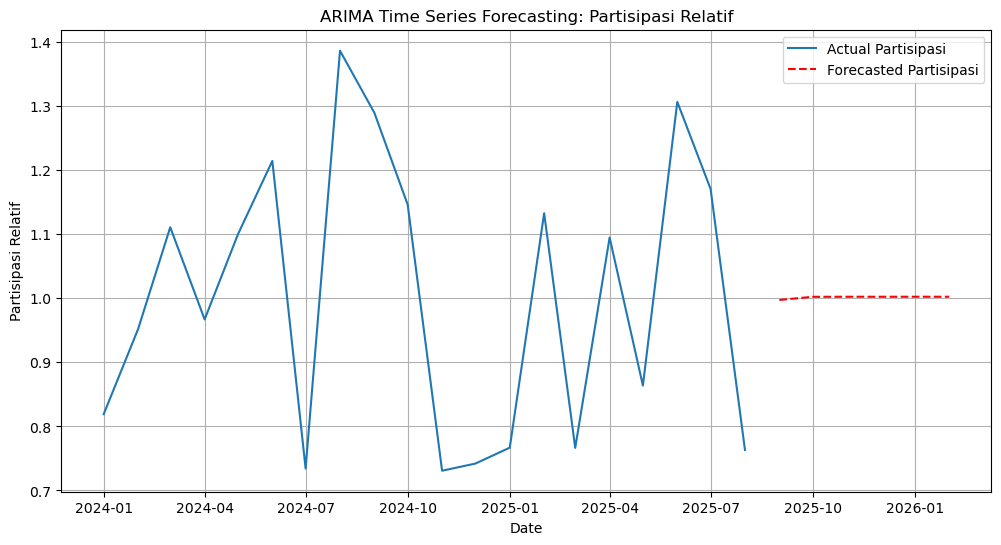

  Forecast_Date  Forecasted_Partisipasi
0    2025-09-01                0.997362
1    2025-10-01                1.002278
2    2025-11-01                1.002382
3    2025-12-01                1.002384
4    2026-01-01                1.002384
5    2026-02-01                1.002384


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

dates = pd.date_range(start='2024-01-01', periods=20, freq='MS')
partisipasi_relatif = np.random.uniform(0.7, 1.4, 20)

df_time_series = pd.DataFrame({
    'engagement_date': dates,
    'partisipasi_relatif': partisipasi_relatif
})
df_time_series.set_index('engagement_date', inplace=True)
df_time_series = df_time_series.asfreq('MS')  # <--- Fix Warning Here

model = ARIMA(df_time_series['partisipasi_relatif'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)
forecast_dates = pd.date_range(start=dates[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

plt.figure(figsize=(12,6))
plt.plot(df_time_series.index, df_time_series['partisipasi_relatif'], label='Actual Partisipasi')
plt.plot(forecast_dates, forecast, label='Forecasted Partisipasi', linestyle='--', color='red')
plt.title('ARIMA Time Series Forecasting: Partisipasi Relatif')
plt.xlabel('Date')
plt.ylabel('Partisipasi Relatif')
plt.legend()
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({
    'Forecast_Date': forecast_dates,
    'Forecasted_Partisipasi': forecast.values
})
print(forecast_df)
